<a href="https://colab.research.google.com/github/Trishlaa07/Kyoto_2015_Dec_day31/blob/main/Customer_Churn_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


 Import Required Libraries

In [10]:
# Import libraries for data handling, visualization, and modeling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

Load Dataset

In [9]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Data Preprocessing

In [15]:
# Step 1: Convert TotalCharges to numeric & drop missing rows
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Step 2: Map target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 3: Check data types
print(df.dtypes)

# Step 4: Convert all categorical columns to dummy variables
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(cat_cols))

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Prepare Features and Target

In [16]:
# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split dataset into training and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Initial Random Forest Model

In [17]:
# Initialize and train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate Initial Model

Initial Model Accuracy: 0.7896233120113717

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.86      1033
           1       0.66      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407



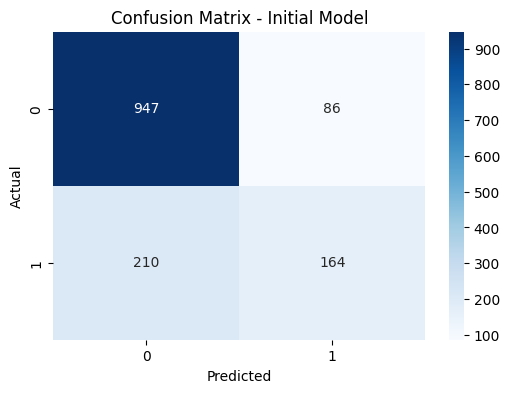

In [18]:
# Predict on test data
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Initial Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Initial Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Hyperparameter Tuning with GridSearchCV

In [19]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use best estimator for predictions
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


Evaluate Tuned Model

Tuned Model Accuracy: 0.7825159914712153

Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.64      0.41      0.50       374

    accuracy                           0.78      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.78      0.77      1407



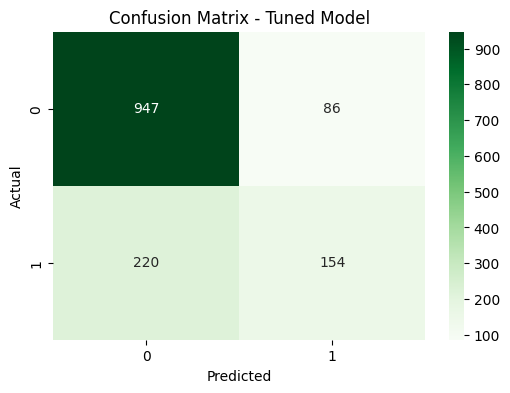

In [20]:
# Predict on test data with tuned model
y_pred_tuned = best_model.predict(X_test)

# Print accuracy and classification report
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report (Tuned Model):\n", classification_report(y_test, y_pred_tuned))

# Plot confusion matrix for tuned model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Plot ROC Curve for Tuned Model

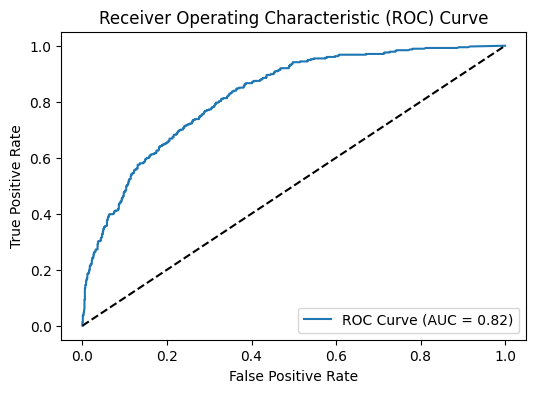

In [21]:
# Get predicted probabilities for positive class
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
